# LUNG CANCER DETECTION
### IMPLEMENTATION OF AI PROJECTS

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd

In [27]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [29]:
#CHECKING NULL VALUES
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [31]:
df=df.drop(['GENDER'],axis=1)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [32]:
#ASSIGNING INPUT AND OUTPUT

X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']

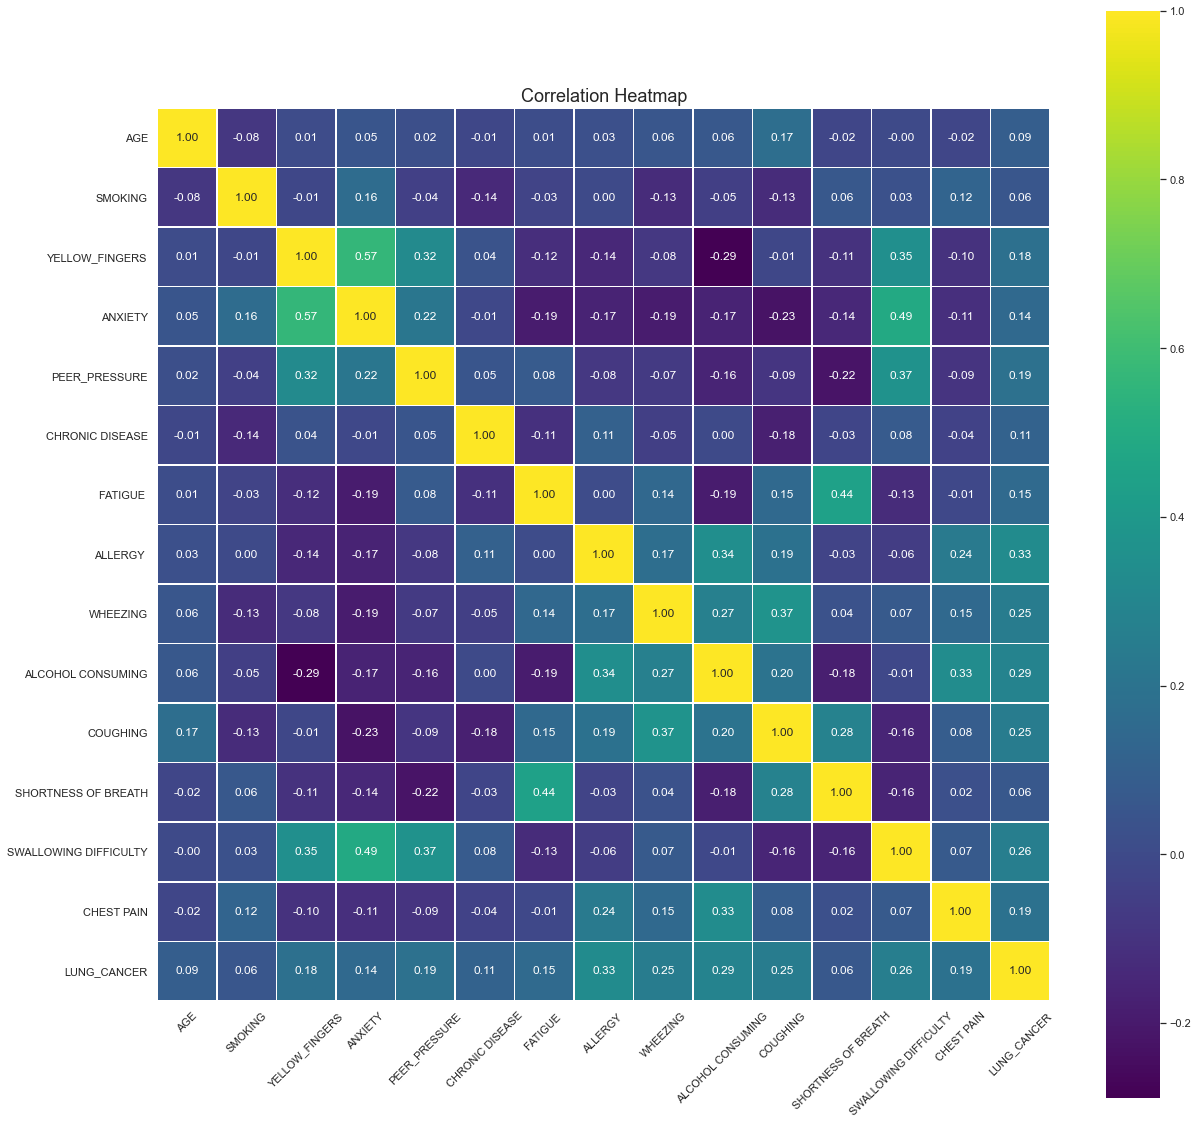

In [33]:
#PLOTTING HEAT MAP

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.set(font_scale=1) 
sns.set_style("whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [34]:
#SPLITTING DATA INTO TRAINING AND TESTING SET

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

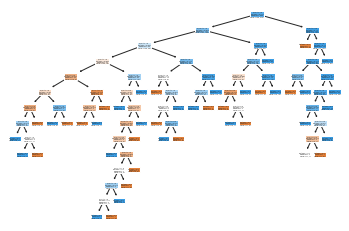

In [41]:
from sklearn import tree
dtree = tree.plot_tree(dt, filled=True)

In [42]:
y_pred = dt.predict(X_test)

In [55]:
#CHECKING THE ACCURACY

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.967741935483871


In [20]:
result_dt = dt.predict([[20,1,1,2,1,1,2,1,1,2,2,2,2,2]])
print(result_dt)

[0]


#### RANDOM FOREST

In [21]:
#TRAINING THE MODEL

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
#TESTING THE MODEL

y_pred = model.predict(X_test)

In [23]:
#CHECKING THE ACCURACY

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9838709677419355


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 1  1]
 [ 0 60]]


In [35]:
from sklearn.metrics import mean_squared_error

result = mean_squared_error (y_test, y_pred, squared = True)
print(result)

0.016129032258064516


In [36]:
result = model.predict([[20,1,1,2,1,1,2,1,1,2,2,2,2,2]])
print(result)

[1]


In [37]:
result1 = model.predict([[2,2,2,2,1,1,2,1,1,2,1,1,2,1]])
print(result1)

[1]


In [38]:
result2 = model.predict([[76,2,2,1,2,2,1,2,2,1,1,1,1,1]])
print(result2)

[1]


In [39]:
result3 = model.predict([[20,1,1,1,1,1,1,1,1,2,1,1,1,1]])
print(result3)

[0]


### SVM

In [44]:
from sklearn.svm import SVC
svc = SVC()

In [45]:
svc.fit(X_train, y_train)

SVC()

In [46]:
y_pred = svc.predict(X_test)

In [47]:
svc.score(X_test, y_test)

0.967741935483871

#### LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred_lr = lr.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred_lr)
print (accuracy)

0.967741935483871


#### LINEAR REGRESSION

In [51]:
from sklearn.linear_model import LinearRegression

lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred_lir = lir.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred_lr)
print (accuracy)

0.967741935483871


In [54]:
# USING PICKLE FOR DEPLOYMENT

import pickle
pickle.dump(model, open('model.pkl', 'wb'))